In [1]:
library(reshape2)
library(lubridate)
library(tseries)
library(MASS,stats)
library(car)
library(fGarch)

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: carData

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



In [2]:
data <- read.csv("SP500.csv")
head(data)

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,20060103,0.016341,0.016340,0.015027,0.015023,11699545700,500,11540511600,500,1268.80,0.016430
2,20060104,0.003931,0.003736,0.006375,0.006284,11740829600,499,11697131300,499,1273.46,0.003673
3,20060105,0.000028,0.000021,0.000621,0.000611,11745619900,500,11745378700,500,1273.48,0.000016
4,20060106,0.009559,0.009322,0.010100,0.009988,11855262700,500,11745619900,500,1285.45,0.009399
5,20060109,0.003710,0.003708,0.005676,0.005673,11899300800,500,11855262700,500,1290.15,0.003656
6,20060110,-0.000340,-0.000394,0.000430,0.000379,11894617400,500,11899300800,500,1289.69,-0.000357


In [3]:
Ret <- data$sprtrn
y  <- as.matrix(Ret)

In [4]:
n <- dim(y)[1]
# Initializing the EWMA matrix
EWMA <- matrix(NA, nrow = n, ncol = 3)
# Determine lambda
lambda <- 0.94

In [5]:
S <- cov(y)
S

0.0002766451


In [6]:
# Fill the initial row of EWMA with the sample covariances
EWMA[1,] <- S[upper.tri(S, diag = TRUE)]

# Manually computing EWMA elements for t = 2

# Apply the formula for EWMA
S_2 <- lambda * S + (1-lambda) * y[1,] %*% t(y[1,])
# Get the variances and covariances
S_2[upper.tri(S_2, diag = TRUE)]

# Populating the EWMA matrix

# Create a loop for rows 2 to n
for (i in 2:n) {
    # Update S with the new weighted moving average
    S <- lambda * S + (1-lambda) * y[i-1,] %*% t(y[i-1,])
    
    # Fill the following EWMA row with the covariances
    EWMA[i,] <- S[upper.tri(S, diag = TRUE)]
}

head(EWMA)

[1] 0.0002762431

0.0002766451,0.0002766451,0.0002766451
0.0002762431,0.0002762431,0.0002762431
0.0002604779,0.0002604779,0.0002604779
0.0002448493,0.0002448493,0.0002448493
0.0002354588,0.0002354588,0.0002354588
0.0002221332,0.0002221332,0.0002221332


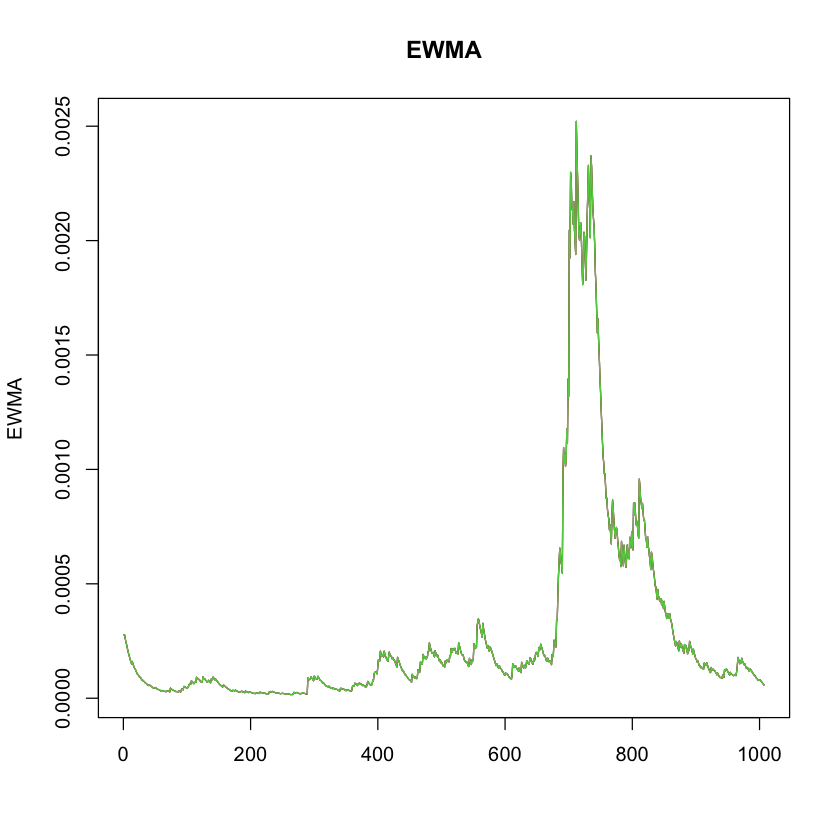

In [7]:
# Plotting estimated variances and covariances
matplot(EWMA, type = "l", main = "EWMA", lty = 1)